In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv(r'david\src\Louisville_Metro_KY_Meals_Served_Summary.csv')
try:
    df = pd.read_csv('david\src\Louisville_Metro_KY_Meals_Served_Summary.csv')
    print("File loaded successfully.")
except pd.errors.EmptyDataError:
        print("The file is empty.")
else:
    print(f"Error parsing the file. Check the format.")
print(df.head())
print(df.info())
print(df.columns)
print(df.describe())

File loaded successfully.
Error parsing the file. Check the format.
   MealID                  Date  BREADFST_SERV  LUNCH_SERV  SNACK_SERV  \
0     301  6/11/2009 4:00:00 AM            0.0          21          25   
1     302  6/11/2009 4:00:00 AM            0.0          22           0   
2     303  6/11/2009 4:00:00 AM            0.0          22          20   
3     304  6/11/2009 4:00:00 AM            0.0          23          26   
4     305  6/11/2009 4:00:00 AM            0.0          27           0   

                        Site            SiteAddress SiteZipcode  ObjectId  
0      VICTORY CHRISTIAN CDC     1410 DIXIE HIGHWAY       40210         1  
1       WALNUT ST ACTIVITIES        1143 S. 3RD ST.       40203         2  
2         REFUGE IN KENTUCKY         207 S. Hancock       40202         3  
3  REDEEMED CHRISTIAN CHURCH  3725 RIVER PARK DRIVE       40211         4  
4  NEW JERUSALEM SPCL MNSTRY     2973 WILSON AVENUE       40211         5  
<class 'pandas.core.frame.DataF

In [6]:
df_drop = df[~df.apply(lambda row: row.astype(str).str.contains('STE 231').any(), axis=1)]
df_filled = df_drop.fillna(0)
df_drop = df_filled.copy()
df_drop['BREADFST_SERV'] = df_drop['BREADFST_SERV'].astype(int)
print(df_drop)

      MealID                  Date  BREADFST_SERV  LUNCH_SERV  SNACK_SERV  \
0        301  6/11/2009 4:00:00 AM              0          21          25   
1        302  6/11/2009 4:00:00 AM              0          22           0   
2        303  6/11/2009 4:00:00 AM              0          22          20   
3        304  6/11/2009 4:00:00 AM              0          23          26   
4        305  6/11/2009 4:00:00 AM              0          27           0   
...      ...                   ...            ...         ...         ...   
9987    9652  7/23/2013 4:00:00 AM             30          70           0   
9988    9653  7/23/2013 4:00:00 AM             31          38           0   
9989    9654  7/23/2013 4:00:00 AM             35           0          32   
9990    9655  7/23/2013 4:00:00 AM             35          33           0   
9991    9656  7/23/2013 4:00:00 AM             36          61           0   

                                   Site              SiteAddress SiteZipcod

             BREADFST_SERV  LUNCH_SERV  SNACK_SERV
SiteZipcode                                       
40202                 1294        3439         400
40203                35726       86061        3076
40204                11385       18452           0
40205                 1296        6648           0
40206                   17        3753        3696
40208                 5998        7719           0
40210                14914       45617        6992
40211                31187       70320       10141
40212                 9262       53730       18513
40213                 5795        6833        2068
40214                12023       12586        3376
40215                 4141       15948        5910
40216                 9023       12563        2769
40218                 4661       33390       32411
40219                  615        1471         429
40220                 5904         709        6788
40223                    0        1977        2120
40228                 3394     

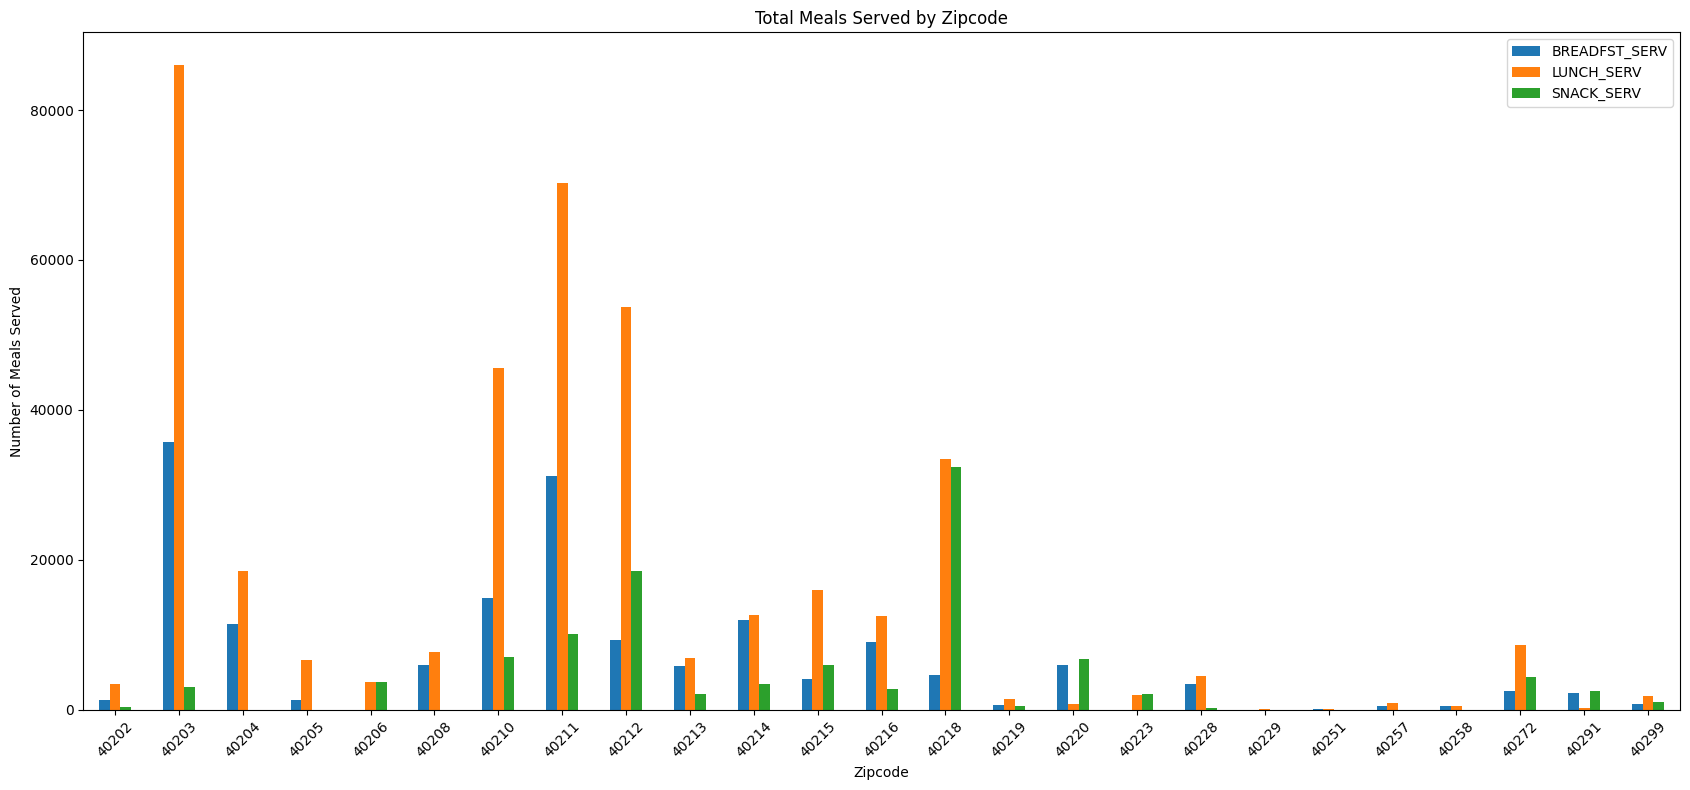

In [ ]:
meal_totals = df_drop.groupby('SiteZipcode')[['BREADFST_SERV', 'LUNCH_SERV', 'SNACK_SERV']].sum()
print(meal_totals)

meal_totals.plot(kind='bar', figsize=(17,8))
plt.title('Total Meals Served by Zipcode')
plt.xlabel('Zipcode')
plt.ylabel('Number of Meals Served')
plt.xticks(rotation=45)
plt.tight_layout() 
plt.show()

In [ ]:
Q1 = meal_totals['LUNCH_SERV'].quantile(0.25)
Q3 = meal_totals['LUNCH_SERV'].quantile(0.75)
IQR = Q3 - Q1
outliers = meal_totals[(meal_totals['LUNCH_SERV'] < (Q1 - 1.5 * IQR)) | (meal_totals['LUNCH_SERV'] > (Q3 + 1.5 * IQR))]
print(outliers)

             BREADFST_SERV  LUNCH_SERV  SNACK_SERV
SiteZipcode                                       
40203                35726       86061        3076
40210                14914       45617        6992
40211                31187       70320       10141
40212                 9262       53730       18513


      BREADFST_SERV  LUNCH_SERV  SNACK_SERV
Year                                       
2009          35975       71567       21522
2010          48236      130015       35146
2011          39267       90054       23174
2012          18976       49689       14247
2013          20757       56627       12586


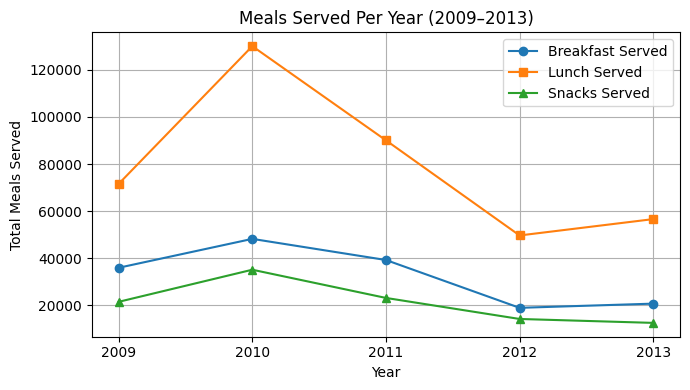

In [ ]:
df_drop['Year'] = pd.to_datetime(df_drop['Date']).dt.year
df_year = df_drop[df_drop['Year'].between(2009, 2014)]
yearly_totals = df_year.groupby('Year')[['BREADFST_SERV', 'LUNCH_SERV', 'SNACK_SERV']].sum()
print(yearly_totals)

plt.figure(figsize=(7, 4))
plt.plot(yearly_totals.index, yearly_totals['BREADFST_SERV'], marker='o', label='Breakfast Served')
plt.plot(yearly_totals.index, yearly_totals['LUNCH_SERV'], marker='s', label='Lunch Served')
plt.plot(yearly_totals.index, yearly_totals['SNACK_SERV'], marker='^', label='Snacks Served')
plt.xticks(yearly_totals.index.astype(int))
plt.title('Meals Served Per Year (2009–2013)')
plt.xlabel('Year')
plt.ylabel('Total Meals Served')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
meals_by_zip_year = df_year.groupby(['SiteZipcode', 'Year'])[['BREADFST_SERV', 'LUNCH_SERV', 'SNACK_SERV']].sum().reset_index()
print(meals_by_zip_year)

meals_by_zip_year['label'] = meals_by_zip_year['SiteZipcode'].astype(str) + " - " + meals_by_zip_year['Year'].astype(str)



   SiteZipcode  Year  BREADFST_SERV  LUNCH_SERV  SNACK_SERV
0        40202  2009            212        1370         400
1        40202  2010            791        1520           0
2        40202  2011            291         549           0
3        40203  2009           5643       12049         412
4        40203  2010           8118       23906        1937
..         ...   ...            ...         ...         ...
84       40272  2013              0        1814        1872
85       40291  2009           2256         263        2463
86       40299  2009            740        1725         874
87       40299  2010              0          12           0
88       40299  2011              0         116         116

[89 rows x 5 columns]


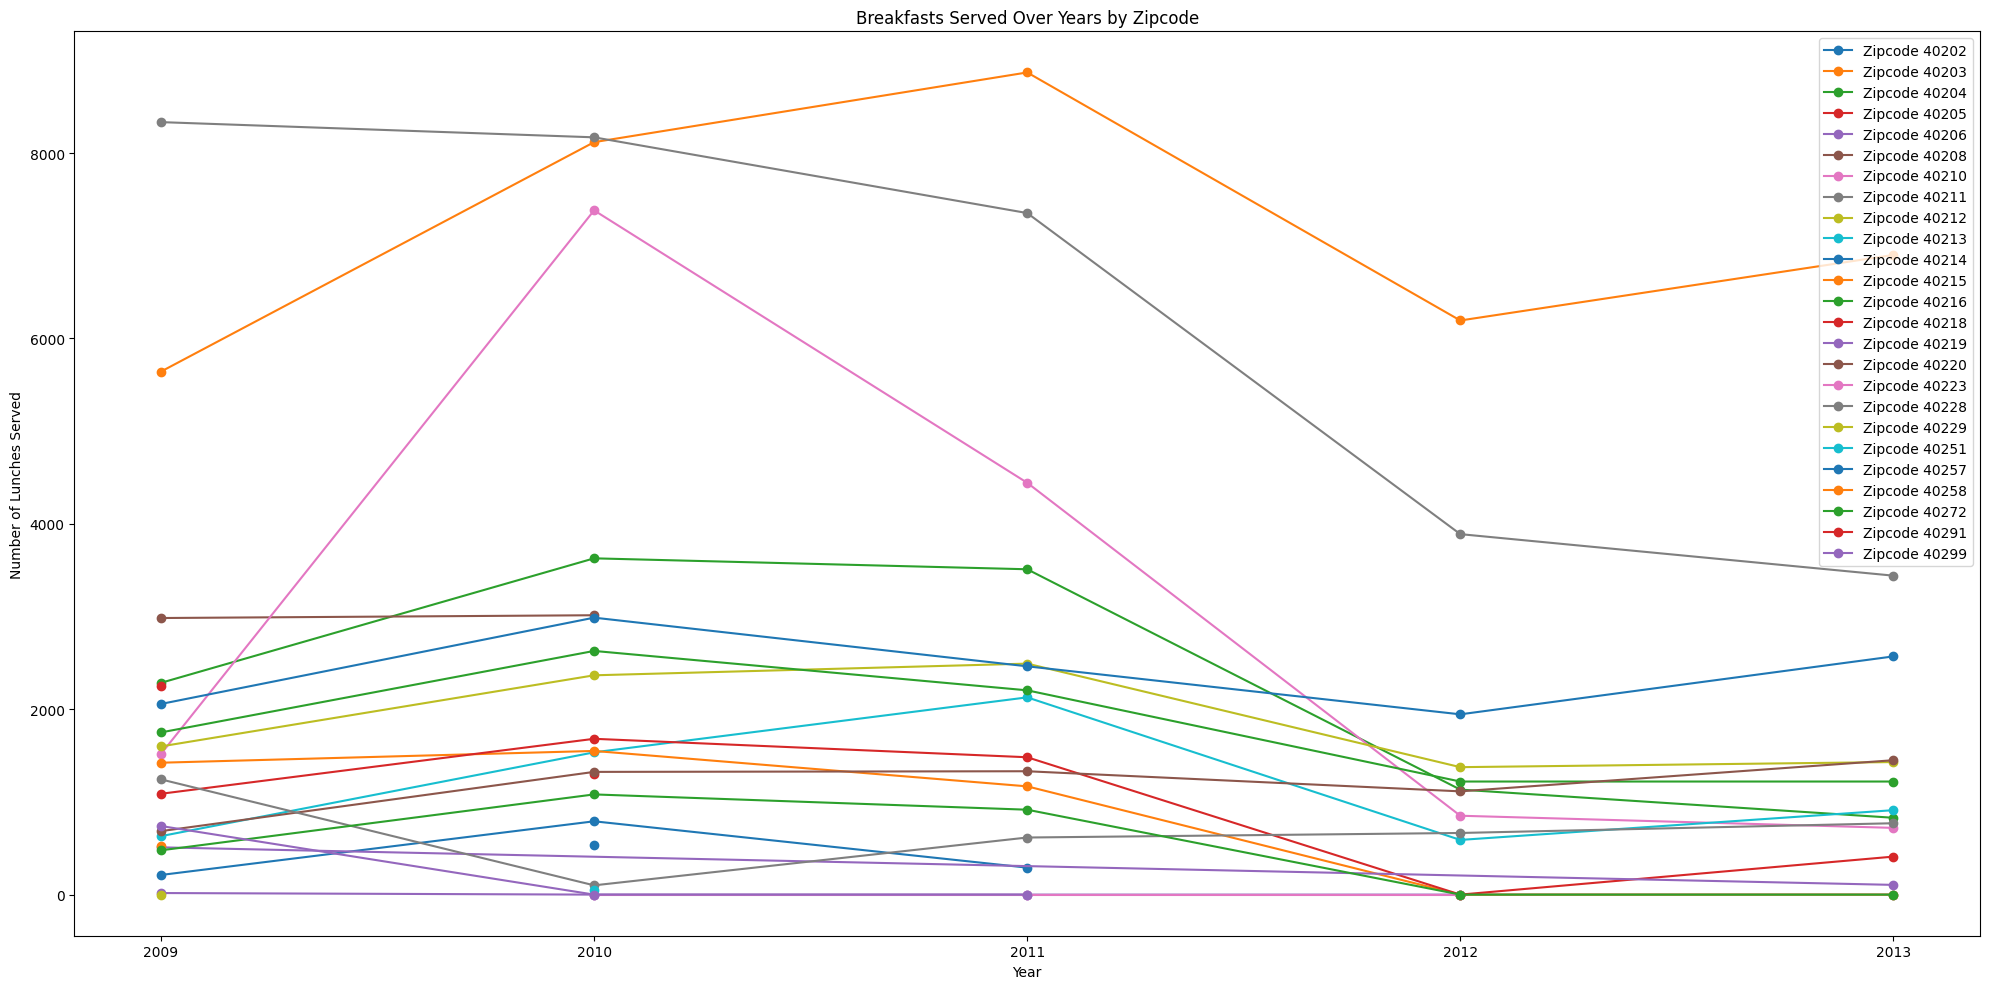

In [ ]:
plt.figure(figsize=(20, 10))
for zipcode in meals_by_zip_year['SiteZipcode'].unique():
    subset = meals_by_zip_year[meals_by_zip_year['SiteZipcode'] == zipcode]
    plt.plot(subset['Year'], subset['BREADFST_SERV'], marker='o', label=f'Zipcode {zipcode}')

plt.title('Breakfasts Served Over Years by Zipcode')
plt.xticks(meals_by_zip_year['Year'].unique())
plt.xlabel('Year')
plt.ylabel('Number of Lunches Served')
plt.legend()
plt.tight_layout()
plt.show()

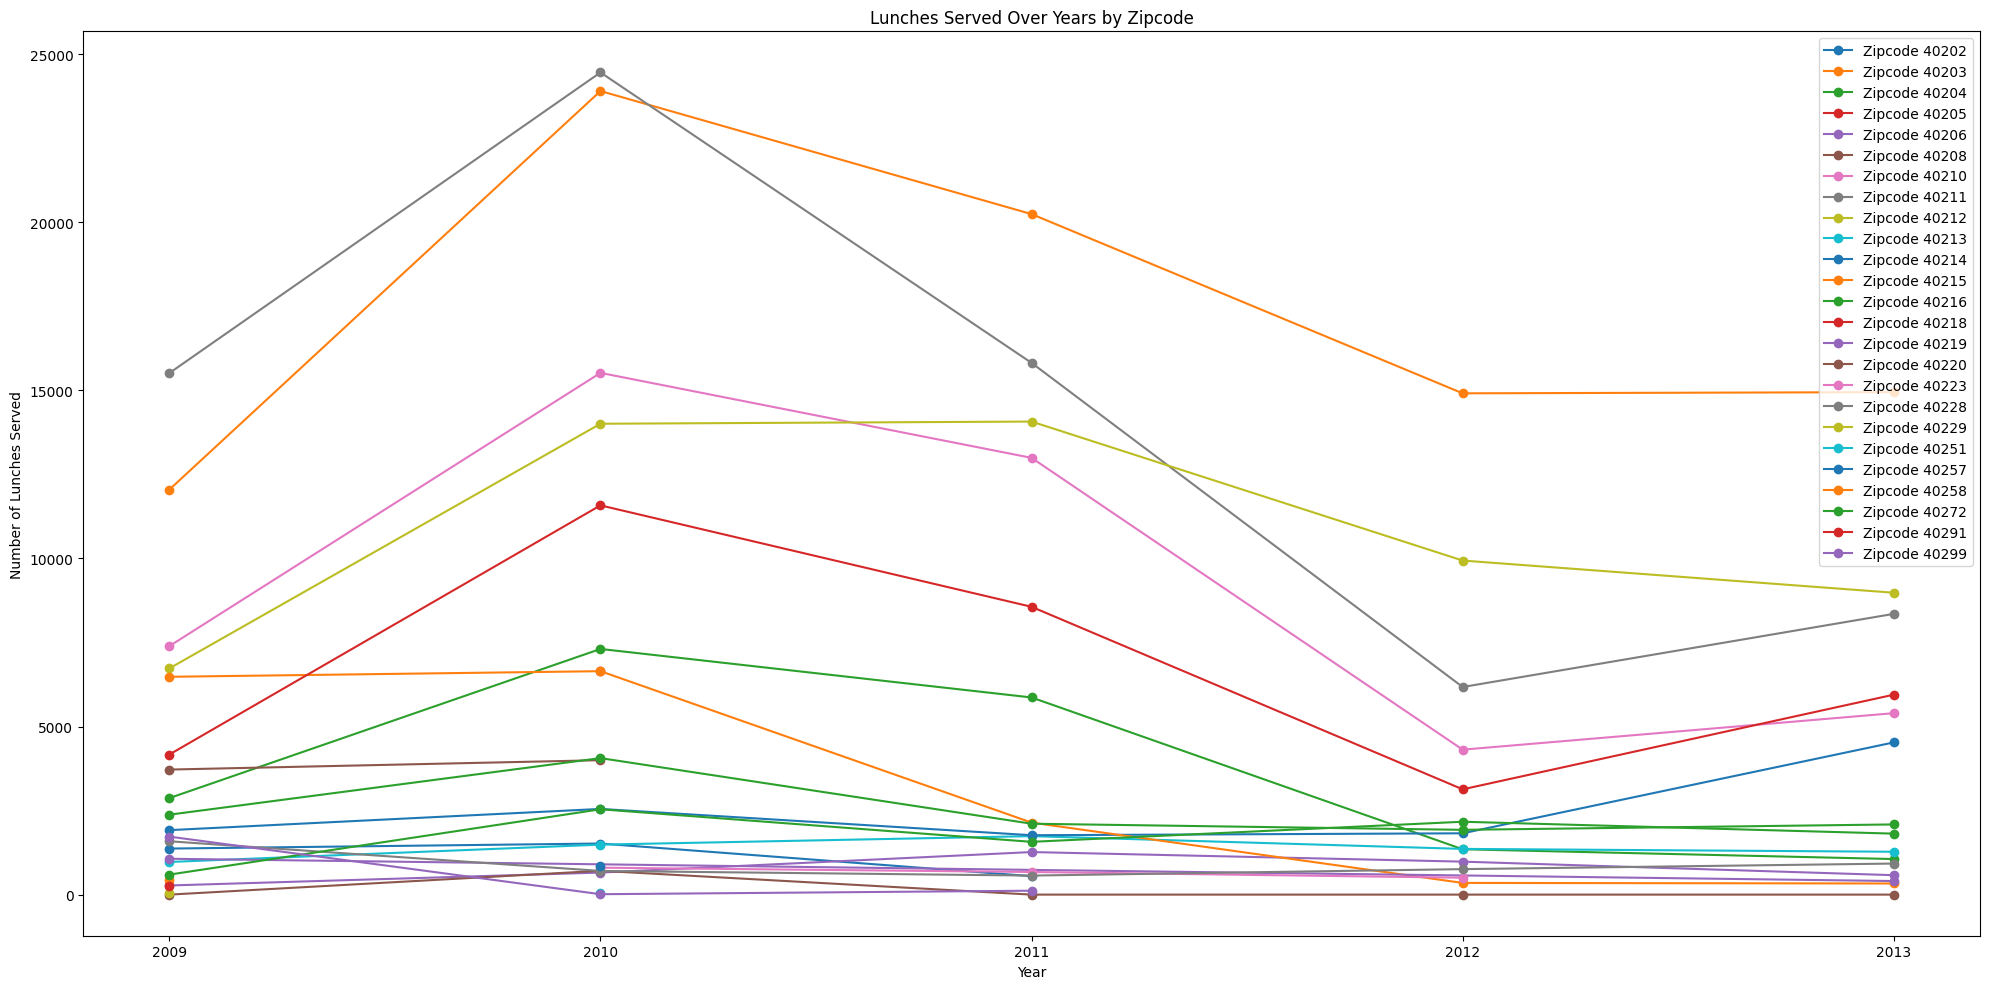

In [ ]:
plt.figure(figsize=(20, 10))
for zipcode in meals_by_zip_year['SiteZipcode'].unique():
    subset = meals_by_zip_year[meals_by_zip_year['SiteZipcode'] == zipcode]
    plt.plot(subset['Year'], subset['LUNCH_SERV'], marker='o', label=f'Zipcode {zipcode}')

plt.title('Lunches Served Over Years by Zipcode')
plt.xticks(meals_by_zip_year['Year'].unique())
plt.xlabel('Year')
plt.ylabel('Number of Lunches Served')
plt.legend()
plt.tight_layout()
plt.show()

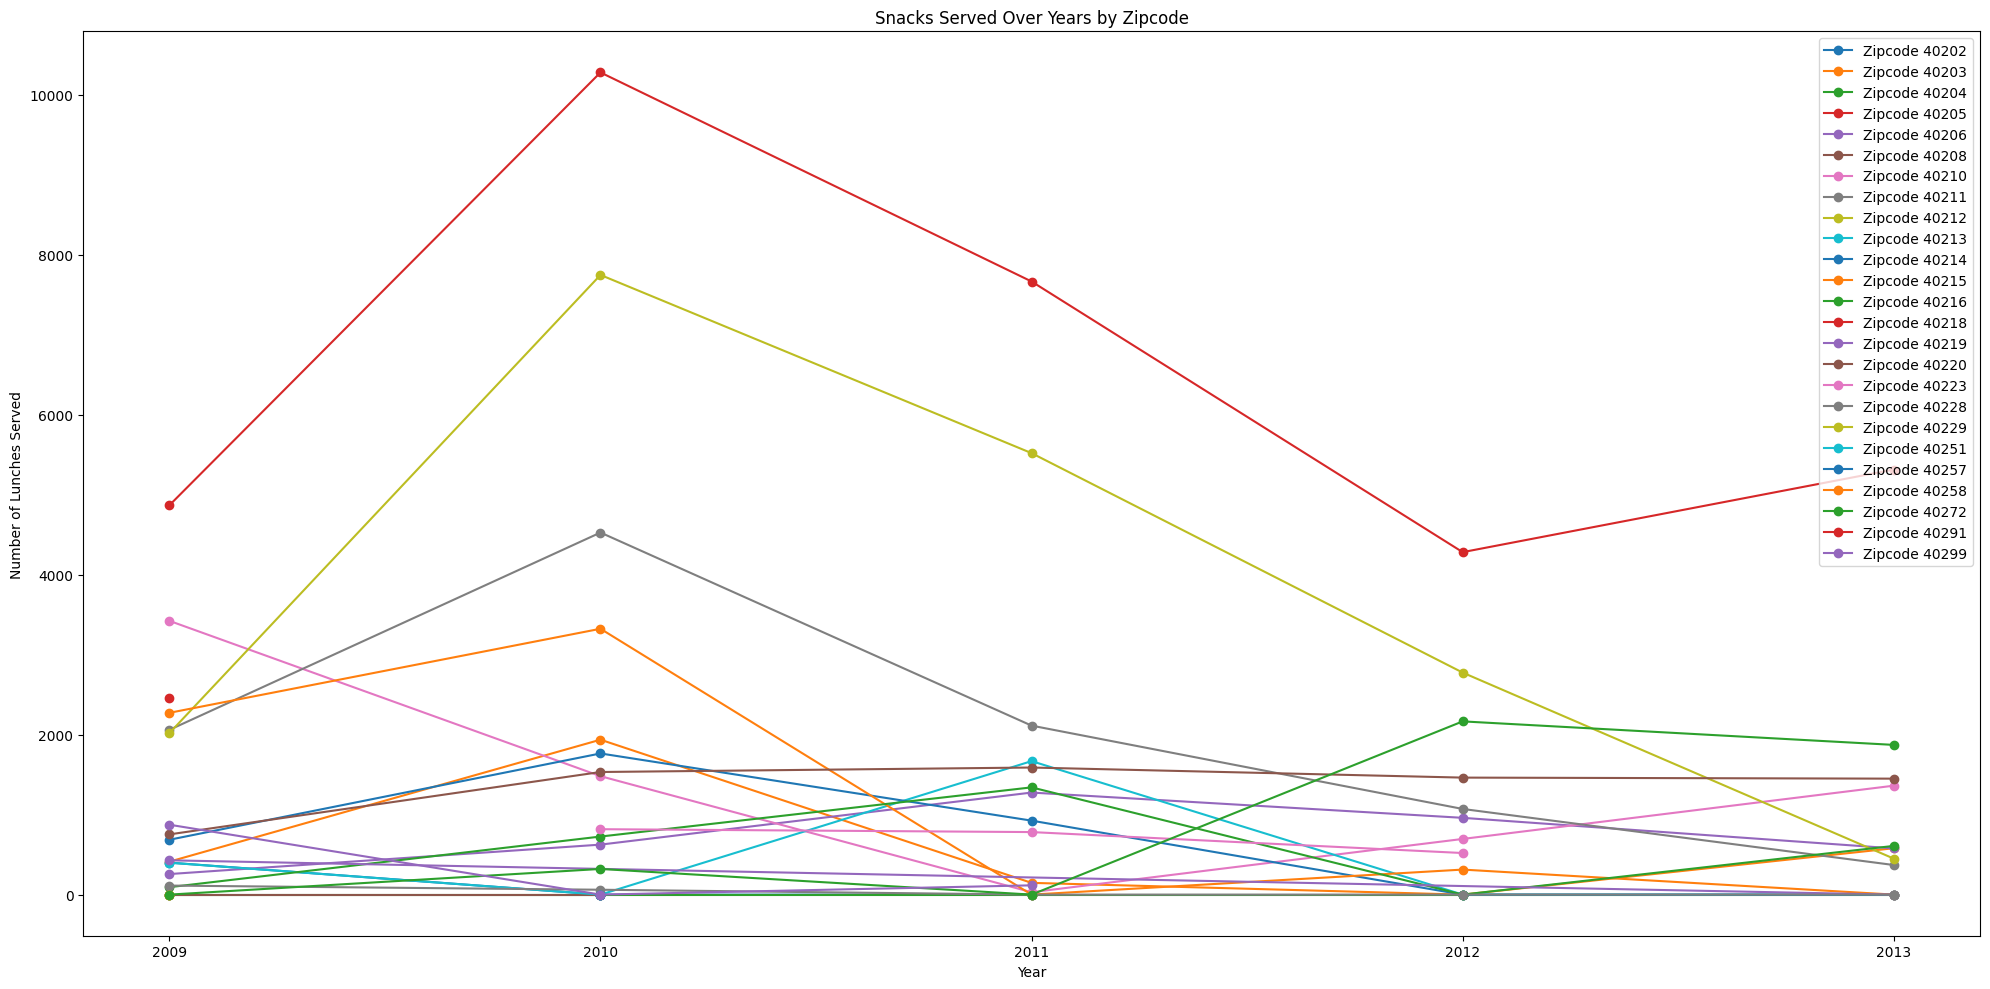

In [ ]:
plt.figure(figsize=(20, 10))
for zipcode in meals_by_zip_year['SiteZipcode'].unique():
    subset = meals_by_zip_year[meals_by_zip_year['SiteZipcode'] == zipcode]
    plt.plot(subset['Year'], subset['SNACK_SERV'], marker='o', label=f'Zipcode {zipcode}')

plt.title('Snacks Served Over Years by Zipcode')
plt.xticks(meals_by_zip_year['Year'].unique())
plt.xlabel('Year')
plt.ylabel('Number of Lunches Served')
plt.legend()
plt.tight_layout()
plt.show()